### データ前処理 基礎

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
DATA_DIR = '/content/drive/MyDrive/project/ML/kai/longterm/data/preprocessing'

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, 'insurance.csv'))
df.head(3)

,age,gender,bmi,children,smoker,region,rank,charges
0,19,female,27.90,0,yes,southwest,A,16884.924
1,18,male,33.77,1,no,southeast,NaN,NaN
2,28,male,33.00,3,no,southeast,NaN,NaN


In [4]:
df.shape

(1338, 8)

In [5]:
t = df['charges'].values
x = df.drop(['charges'], axis=1).values

from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, t_train)

ValueError: ignored

In [6]:
# Duplicated records
df.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [7]:
df.duplicated(keep=False).value_counts()

False    1338
dtype: int64

In [8]:
df.isnull()[:5]

,age,gender,bmi,children,smoker,region,rank,charges
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,True,True
3,False,False,False,False,True,False,True,False
4,False,False,True,False,True,False,True,True


In [9]:
df.isnull().sum()

age            0
gender         0
bmi           77
children       0
smoker        92
region         0
rank        1296
charges       13
dtype: int64

In [10]:
df.shape

(1338, 8)

In [11]:
df = df.dropna(subset=['charges'])

In [12]:
df.shape

(1325, 8)

In [13]:
df = df.drop(labels='rank', axis=1)

In [14]:
df.shape

(1325, 7)

In [15]:
df.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
3,33,male,22.705,0,NaN,northwest,21984.47061
9,60,female,NaN,0,no,northwest,28923.13692


In [16]:
df.isnull().sum()

age          0
gender       0
bmi         73
children     0
smoker      89
region       0
charges      0
dtype: int64

In [17]:
df.describe()

,age,bmi,children,charges
count,1325.000000,1252.000000,1325.000000,1325.000000
mean,39.314717,30.716434,1.096604,13363.042018
std,14.053463,6.156412,1.206614,12131.047621
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.400000,0.000000,4779.602300
50%,40.000000,30.400000,1.000000,9447.382400
75%,51.000000,34.816250,2.000000,16884.924000
max,64.000000,53.130000,5.000000,63770.428010


(array([ 30., 120., 211., 301., 260., 195.,  86.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

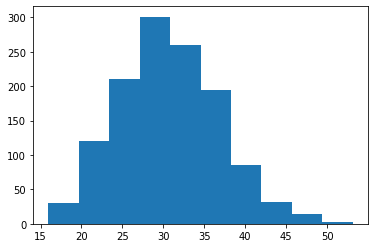

In [18]:
plt.hist(df['bmi'])

In [19]:
df['bmi'].mean()

30.71643370607028

In [20]:
df = df.fillna({'bmi': df['bmi'].mean()})

In [21]:
df.isnull().sum()

age          0
gender       0
bmi          0
children     0
smoker      89
region       0
charges      0
dtype: int64

In [22]:
df['smoker'].unique()

array(['yes', nan, 'no'], dtype=object)

In [23]:
df['smoker'].mode()

0    no
dtype: object

In [24]:
df['smoker'].mode()[0]

'no'

In [25]:
df = df.fillna({'smoker': df['smoker'].mode()[0]})

In [26]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
df_obj = df.select_dtypes(include='object')
df_obj.head(3)

,gender,smoker,region
0,female,yes,southwest
3,male,no,northwest
9,female,no,northwest


In [29]:
df_uni = df_obj.nunique()
df_uni

gender    2
smoker    2
region    4
dtype: int64

In [30]:
for uni in df_obj.columns:
    print(uni)
    print(df_obj[uni].unique())

gender
['female' 'male']
smoker
['yes' 'no']
region
['southwest' 'northwest' 'southeast' 'northeast']


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
le.fit(df['gender'])

LabelEncoder()

In [33]:
le.transform(df['gender'])

array([0, 1, 0, ..., 0, 0, 0])

In [34]:
df['gender'] = le.transform(df['gender'])

In [35]:
df.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900000,0,yes,southwest,16884.92400
3,33,1,22.705000,0,no,northwest,21984.47061
9,60,0,30.716434,0,no,northwest,28923.13692


In [36]:
le.classes_

array(['female', 'male'], dtype=object)

In [37]:
df_uni

gender    2
smoker    2
region    4
dtype: int64

In [39]:
df_cols = df_uni[df_uni == 2].index
df_cols

Index(['gender', 'smoker'], dtype='object')

In [40]:
for col in df_cols:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [41]:
df.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900000,0,1,southwest,16884.92400
3,33,1,22.705000,0,0,northwest,21984.47061
9,60,0,30.716434,0,0,northwest,28923.13692


In [42]:
df.shape

(1325, 7)

In [43]:
df = pd.get_dummies(df, drop_first=True)

In [44]:
df.head(3)

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900000,0,1,16884.92400,0,0,1
3,33,1,22.705000,0,0,21984.47061,1,0,0
9,60,0,30.716434,0,0,28923.13692,1,0,0


In [45]:
df.shape

(1325, 9)

In [47]:
t = df['charges'].values
x = df.drop(['charges'], axis=1).values

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(x_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.7499949702183968
test score :  0.744886018712194
